# Requirements

In [41]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
import os

# Loading Models

In [ ]:
IMAGE_ADDRESS = os.path.join("images", "image1.jpg")
YOLO_WEIGHT = os.path.join("models", "yolov3.weights")
YOLO_CONFIG_PATH = os.path.join("models", "yolov3.cfg")
YOLO_LABELES_PATH = os.path.join("models", "coco.names")
CONFIDENCE = 0.5
THRESHOLD = 0.3

# load our YOLO object detector trained on COCO dataset (80 classes)
net = None # TODO
LABELS = open(YOLO_LABELES_PATH).read().strip().split("\n")

# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

# Loading Image

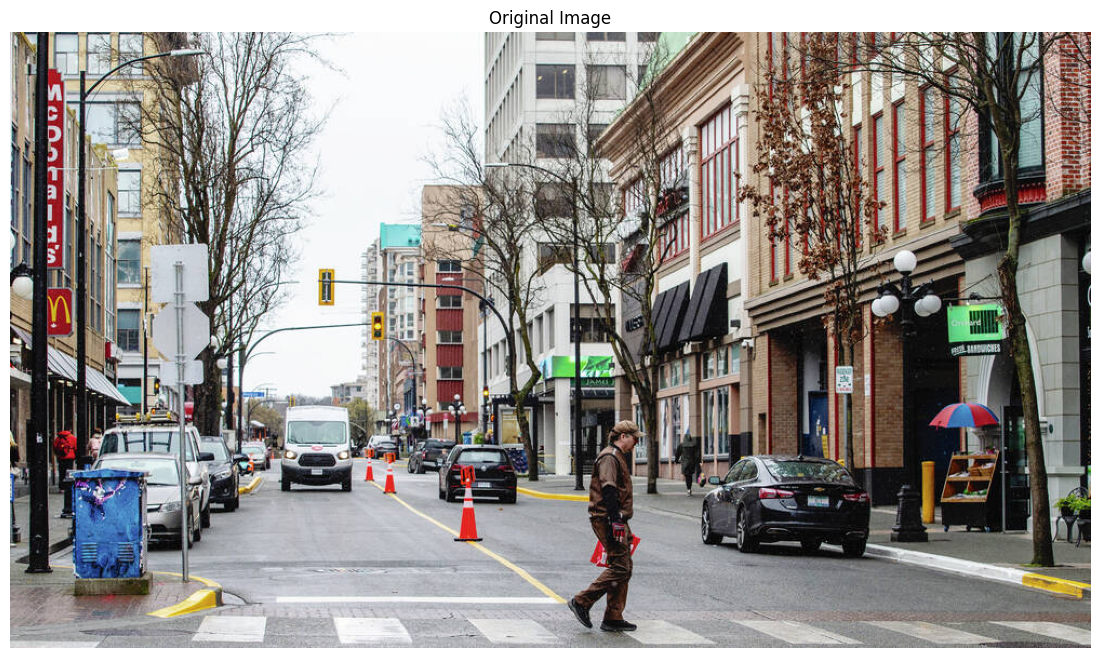

In [ ]:
# Load our input image from the specified address
image = None # TODO

# Convert the image from RGB to BGR color space (OpenCV uses BGR by default)
image = None # TODO

# Grab the spatial dimensions (height and width) of the image
H, W = None # TODO

# Display Original Image
# TODO

# Object Detection Function

In [ ]:
def YOLO(image, net):
    # Get the names of all the layers in the network
    ln = net.getLayerNames()
    # Get the names of the output layers (those layers that produce the final predictions)
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

    # Construct a blob from the input image and perform mean subtraction, scaling, and channel swapping
    blob = None # TODO
    # Set the blob as input to the network
    # TODO
    
    # Perform a forward pass through the network to get the output predictions
    layerOutputs = None # TODO

    # Initialize lists to store the bounding boxes, confidences, and class IDs of the detected objects
    boxes = []
    confidences = []
    classIDs = []

    # Loop over each of the layer outputs
    for output in layerOutputs:
        # Loop over each detection in the output
        for detection in output:
            # Extract the scores for each class and find the class ID with the highest score
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            # Filter out weak predictions by ensuring the confidence is greater than the threshold
            if confidence > CONFIDENCE:
                # Scale the bounding box coordinates back to the size of the original image
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                # Use the center coordinates to derive the top-left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                # Update the lists of bounding box coordinates, confidences, and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # Apply non-maxima suppression to suppress weak, overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, THRESHOLD)

    # Ensure at least one detection exists
    if len(idxs) > 0:
        # Loop over the indexes we are keeping
        for i in idxs.flatten():
            # Extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            
            # Draw the bounding box rectangle and label on the image
            # Get the color for the current object's bounding box and label
            # The color is obtained from the COLORS array using the object's class ID
            color = [int(c) for c in COLORS[classIDs[i]]]

            # Draw a rectangle around the detected object on the image
            # The rectangle is defined by the top-left corner (x, y) and the bottom-right corner (x + w, y + h)
            # The color and thickness of the rectangle are specified
            # TODO

            # Prepare the text label to display the object's class and confidence score
            # The label is formatted to include the class name and confidence score with four decimal places
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])

            # Draw the text label on the image above the bounding box
            # The text is placed at the position (x, y - 5) with the specified font type, size, color, and thickness
            # TODO

    # Return the output image with the drawn bounding boxes and labels
    return image

# Visualizing the Result

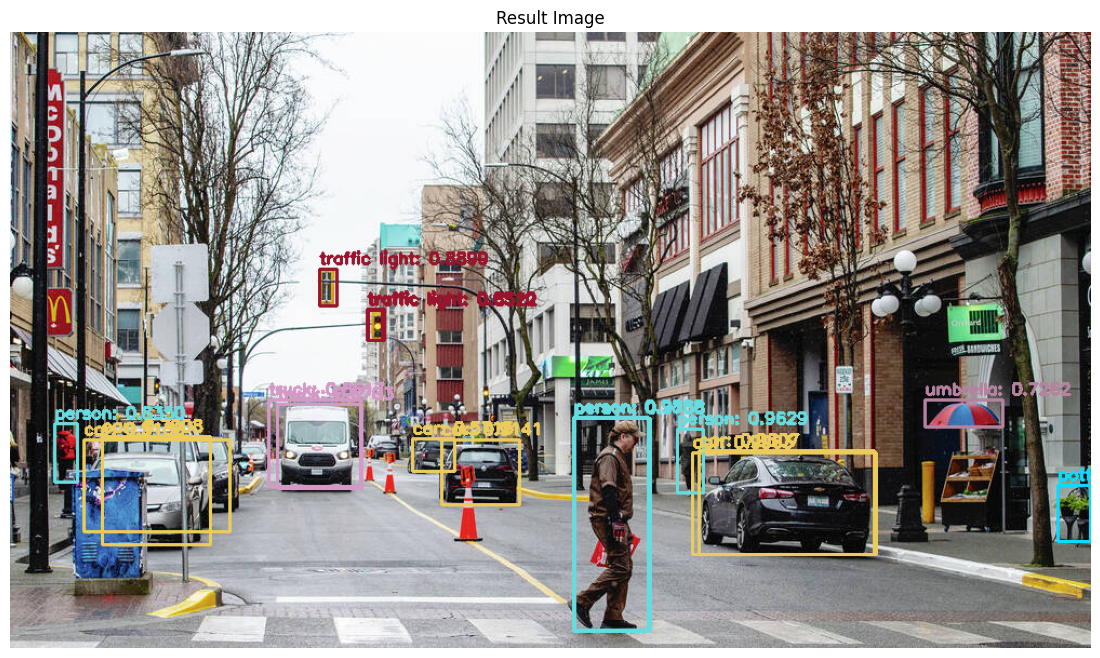

In [ ]:
# Detect objects of the image
result = None # TODO

# TODO